# Use OSMnx to plot street network over place shape

Author: [Geoff Boeing](https://geoffboeing.com/)

  - [Documentation](https://osmnx.readthedocs.io/)
  - [Journal article and citation info](https://geoffboeing.com/publications/osmnx-paper/)
  - [Code repository](https://github.com/gboeing/osmnx)
  - [Examples gallery](https://github.com/gboeing/osmnx-examples)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox

ox.__version__

'2.0.2'

This example uses Portland, Maine - a city with several islands within its municipal boundaries. Thus, we set `retain_all=True` when getting the network so that we keep all the graph components, not just the largest connected component.

In [6]:
# get the place boundaries
place = "New York, New York"
gdf = ox.geocoder.geocode_to_gdf(place)

# get the street network, with retain_all=True to retain all the disconnected islands' networks
G = ox.graph.graph_from_place(place, network_type="drive", retain_all=True)

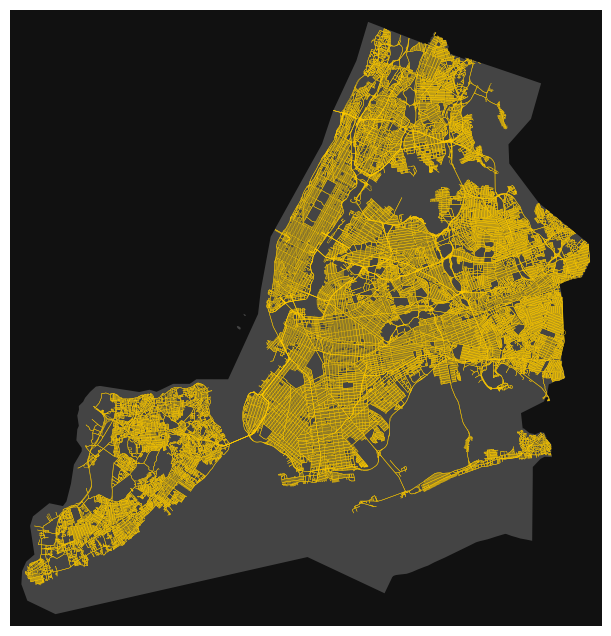

In [7]:
# plot the network, but do not show it or close it yet
fig, ax = ox.plot.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#111111",
    edge_color="#ffcb00",
    edge_linewidth=0.3,
    node_size=0,
)

# to this matplotlib axis, add the place shape(s)
gdf.plot(ax=ax, fc="#444444", ec=None, lw=1, alpha=1, zorder=-1)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.union_all().bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

In [15]:
digraph = ox.convert.to_digraph(G, weight='length')
digraph.nodes()

NodeView((39076461, 39076490, 39076504, 42421728, 42421731, 42421737, 42421741, 42421745, 42421749, 42421751, 42421769, 42421772, 42421775, 42421776, 42421778, 42421783, 42421785, 42421786, 42421791, 42421800, 42421803, 42421806, 42421809, 42421810, 42421820, 42421828, 42421852, 42421857, 42421865, 42421877, 42421889, 42421941, 42421946, 42421951, 42421960, 42421965, 42421969, 42421972, 42421974, 42421982, 42421985, 42421993, 42421996, 42422000, 42422006, 42422016, 42422018, 42422026, 42422028, 42422038, 42422042, 42422050, 42422053, 42422086, 42422110, 42422168, 42422258, 42422270, 42422283, 42422399, 42422449, 42422509, 42422592, 42422899, 42423020, 42423039, 42423051, 42423070, 42423101, 42423116, 42423170, 42423189, 42423203, 42423295, 42423296, 42423307, 42423456, 42423514, 42423549, 42423564, 42423565, 42423579, 42423674, 42423752, 42423774, 42423832, 42423836, 42423847, 42423885, 42424025, 42424032, 42424089, 42424117, 42424133, 42424142, 42424145, 42424225, 42424235, 42424258, 

Notice this municipal boundary is an administrative boundary, not a physical boundary, so it represents jurisdictional bounds, not individual physical features like islands. To retrieve individual islands' geometries, use the `features` module to search for features matching certain OSM tags:

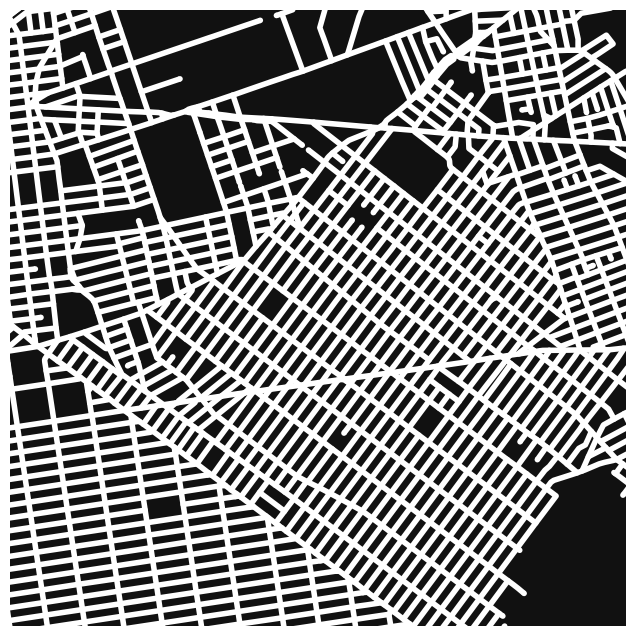

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [18]:
ox.plot.plot_figure_ground(G, dist=2000, street_widths=None, default_width=4, color='w')